# Analysis of results 

In [1]:
cd ~/thesis/

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Initial processing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import ast

from analysis_utils import *

/tmp/ipykernel_597/70208650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
results_df = pd.read_csv('results.csv')

In [4]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,60%,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,execution_timestamp
0,blog_catalog,10312,333983,global,macro,0.206881,0.198260,0.203987,0.197676,0.204249,0.213441,0.207566,0.200646,0.203842,"(128, 40, 80, 0.25, 1)",4434.546483,prune,512,5876,27/06/2024 - 17:56
1,blog_catalog,10312,333983,global,micro,0.207143,0.199490,0.205712,0.199235,0.205714,0.213946,0.208424,0.200893,0.204422,"(128, 40, 80, 0.25, 1)",4434.546483,prune,512,5876,27/06/2024 - 17:56
2,blog_catalog,10312,333983,local,macro,0.202872,0.203426,0.200567,0.198456,0.195736,0.193804,0.197401,0.194467,0.198943,"(128, 40, 80, 0.25, 1)",1480.310039,prune,512,5876,27/06/2024 - 17:56
3,blog_catalog,10312,333983,local,micro,0.203488,0.204072,0.202004,0.200727,0.198604,0.197641,0.200582,0.194909,0.200086,"(128, 40, 80, 0.25, 1)",1480.310039,prune,512,5876,27/06/2024 - 17:56
4,blog_catalog,10312,333983,global,macro,0.200834,0.210289,0.210877,0.209526,0.203182,0.207438,0.204058,0.209059,0.202112,"(128, 40, 80, 0.25, 1)",4956.535452,extend,512,512,27/06/2024 - 14:48
5,blog_catalog,10312,333983,global,micro,0.201550,0.210373,0.211377,0.209697,0.203258,0.207822,0.204876,0.209333,0.202349,"(128, 40, 80, 0.25, 1)",4956.535452,extend,512,512,27/06/2024 - 14:48
6,blog_catalog,10312,333983,local,macro,0.195109,0.183358,0.185802,0.185464,0.198236,0.205639,0.206093,0.208703,0.208768,"(128, 40, 80, 0.25, 1)",1585.535359,extend,512,512,27/06/2024 - 14:48
7,blog_catalog,10312,333983,local,micro,0.197674,0.185167,0.188106,0.187152,0.199767,0.206367,0.206538,0.209333,0.208814,"(128, 40, 80, 0.25, 1)",1585.535359,extend,512,512,27/06/2024 - 14:48
8,blog_catalog,10312,333983,global,macro,0.200753,0.199724,0.214322,0.201168,0.206342,0.200239,0.198569,0.192867,0.195230,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57
9,blog_catalog,10312,333983,global,micro,0.204457,0.201648,0.214932,0.201939,0.207331,0.200388,0.199335,0.193939,0.195453,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57


In [5]:
results_df.size

65040

In [6]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [7]:
sub_df = accu_time_df_gen(results_df, config)

In [8]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [9]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.0062304228615382, 69.9747829843204)

In [10]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953


### Hyperparameter tuning

In [5]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

In [7]:
all_parameters = [ast.literal_eval(param_str) for param_str in all_parameters]

In [8]:
all_parameters

[(128, 40, 80, 0.25, 1),
 (128, 40, 80, 0.25, 4),
 (128, 40, 80, 0.25, 2),
 (128, 80, 80, 4, 4),
 (128, 80, 80, 4, 2),
 (128, 80, 80, 4, 1),
 (128, 80, 80, 2, 4),
 (128, 80, 80, 2, 2),
 (128, 80, 80, 2, 1),
 (128, 80, 80, 1, 4),
 (128, 80, 80, 1, 2),
 (128, 80, 80, 1, 1),
 (128, 80, 80, 0.25, 4),
 (128, 80, 80, 0.25, 2),
 (128, 80, 80, 0.25, 1),
 (128, 40, 80, 4, 4),
 (128, 40, 80, 4, 2),
 (128, 40, 80, 4, 1),
 (128, 40, 80, 2, 4),
 (128, 40, 80, 2, 2),
 (128, 40, 80, 2, 1),
 (128, 40, 80, 1, 4),
 (128, 40, 80, 1, 2),
 (128, 40, 80, 1, 1),
 (128, 40, 80, 0.25, 0.5),
 (128, 40, 80, 0.25, 0.25),
 (128, 80, 160, 4, 4),
 (128, 80, 160, 4, 2),
 (128, 80, 160, 4, 1),
 (128, 80, 160, 4, 0.5),
 (128, 80, 160, 4, 0.25),
 (128, 80, 160, 2, 4),
 (128, 80, 160, 2, 2),
 (128, 80, 160, 2, 1),
 (128, 80, 160, 2, 0.5),
 (128, 80, 160, 2, 0.25),
 (128, 80, 160, 1, 4),
 (128, 80, 160, 1, 2),
 (128, 80, 160, 1, 1),
 (128, 80, 160, 1, 0.5),
 (128, 80, 160, 1, 0.25),
 (128, 80, 160, 0.5, 4),
 (128, 80, 160

In [9]:
D = set()
R = set()
L = set()
P = set()
Q = set()


for param in all_parameters:
    d, r, l, p, q = param
    D.add(d)
    R.add(r)
    L.add(l)
    P.add(p)
    Q.add(q)

In [11]:
D, R, L, P, Q

({64, 128},
 {8, 10, 20, 40, 80},
 {8, 80, 160, 240},
 {0.25, 0.5, 1, 2, 4},
 {0.25, 0.5, 1, 2, 4})

#### Cora

In [9]:
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [10]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [11]:
all_df

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
1,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
3,cora,local,"(128, 40, 80, 0.25, 4)",extend,0.762352,29.946715
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
...,...,...,...,...,...,...
199,cora,local,"(128, 40, 80, 0.5, 0.25)",extend,0.802119,33.299119
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927
201,cora,local,"[64, 8, 8, 0.25, 4]",extend,0.663561,2.501036
202,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.731451,2.913603


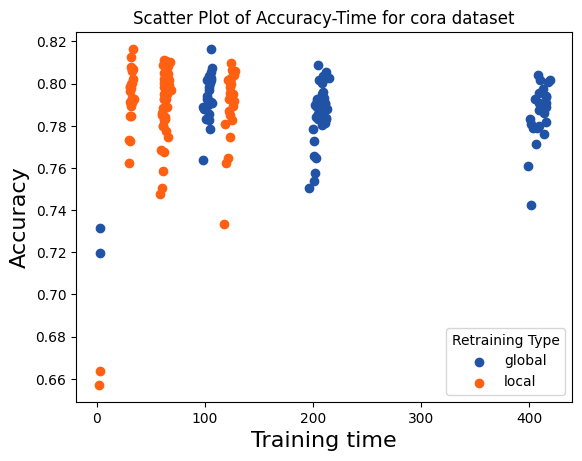

In [12]:
accu_time_plot(all_df)

In [13]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,cora,local,"(128, 40, 80, 2, 1)",extend,0.816479,33.817051
32,cora,global,"(128, 40, 80, 4, 2)",extend,0.816394,105.576616
51,cora,local,"(128, 40, 80, 0.25, 0.25)",extend,0.812863,31.953484
153,cora,local,"(128, 40, 160, 1, 1)",extend,0.811209,62.478489
145,cora,local,"(128, 40, 160, 2, 0.5)",extend,0.810902,63.524729
113,cora,local,"(128, 80, 80, 1, 0.25)",extend,0.810208,64.816080
105,cora,local,"(128, 80, 80, 4, 0.25)",extend,0.810062,67.367942
87,cora,local,"(128, 80, 160, 0.5, 1)",extend,0.809882,123.806995
126,cora,global,"(128, 80, 80, 0.25, 0.25)",extend,0.809080,204.833654
163,cora,local,"(128, 40, 160, 0.5, 1)",extend,0.808739,61.532741


In [14]:
all_df.loc[all_df['retraining_type'] == 'global']

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
6,cora,global,"(128, 80, 80, 4, 4)",extend,0.802823,214.764291
8,cora,global,"(128, 80, 80, 4, 2)",extend,0.802578,211.522388
...,...,...,...,...,...,...
194,cora,global,"(128, 40, 80, 0.5, 1)",extend,0.782708,104.047462
196,cora,global,"(128, 40, 80, 0.5, 0.5)",extend,0.803651,103.660669
198,cora,global,"(128, 40, 80, 0.5, 0.25)",extend,0.785540,104.126992
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927


In [15]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 4, 2)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.8163936506487652,
 'training_time': 105.576616048813}

#### Wikipedia 

In [16]:
config = {'dataset': 'wikipedia',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}


In [17]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

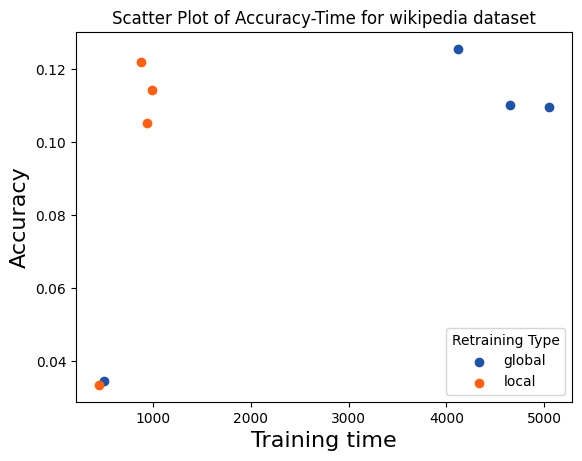

In [18]:
accu_time_plot(all_df)

In [19]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[all_df['average_accuracy'].argmax()])

{'dataset': 'wikipedia',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 1)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.1256420338240266,
 'training_time': 4115.74851751328}

#### PPI

In [20]:
config = {'dataset': 'PPI',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [21]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [22]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

PPI,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,PPI,local,"(128, 40, 80, 2, 1)",extend,0.103872,103.184063
9,PPI,local,"(128, 80, 80, 4, 2)",extend,0.101657,172.781480
11,PPI,local,"(128, 80, 80, 4, 1)",extend,0.101450,167.833059
19,PPI,local,"(128, 80, 80, 1, 4)",extend,0.098656,174.081321
50,PPI,global,"(128, 40, 80, 0.25, 0.25)",extend,0.098650,388.765121
32,PPI,global,"(128, 40, 80, 4, 2)",extend,0.098615,425.821706
23,PPI,local,"(128, 80, 80, 1, 1)",extend,0.098259,168.280955
31,PPI,local,"(128, 40, 80, 4, 4)",extend,0.098193,101.546633
46,PPI,global,"(128, 40, 80, 1, 1)",extend,0.098017,421.142078
33,PPI,local,"(128, 40, 80, 4, 2)",extend,0.097698,102.307316


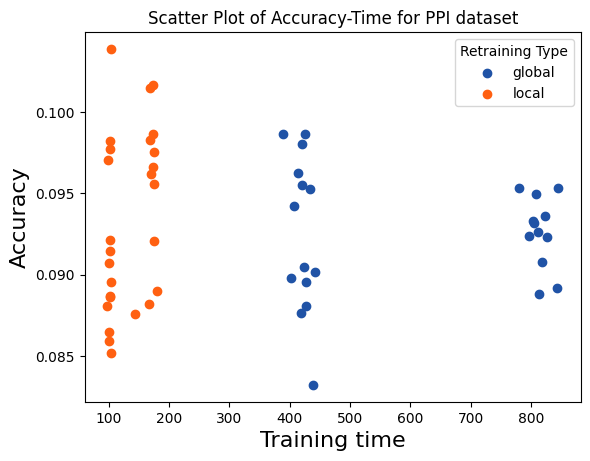

In [23]:
accu_time_plot(all_df)

In [24]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'PPI',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 0.25)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.09864955767362732,
 'training_time': 388.765121221542}

#### BlogCatalog

In [25]:

#     config = {'dataset': 'blog_catalog',
#             'dynamic_update': 'extend',
#             'metric': 'macro',
#             'num_different_nodes': 1024}

## Table of results for specific dataset

In [26]:
perc_list = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']

In [28]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'parameters': '(128, 40, 80, 4, 2)',
          'num_different_nodes': 512}

In [29]:
table_df = table_df_gen(results_df, config)

In [30]:
dict(sub_df.iloc[sub_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 80, 160, 4, 4)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.7906122755311732,
 'training_time': 415.683768033981}

In [31]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [32]:
# Filter the DataFrame for 'macro' and 'micro' scores
macro_df = table_df[table_df['metric'] == 'macro']
micro_df = table_df[table_df['metric'] == 'micro']

# X-axis values
x_values = 1 - np.arange(0.1, 1, 0.1)

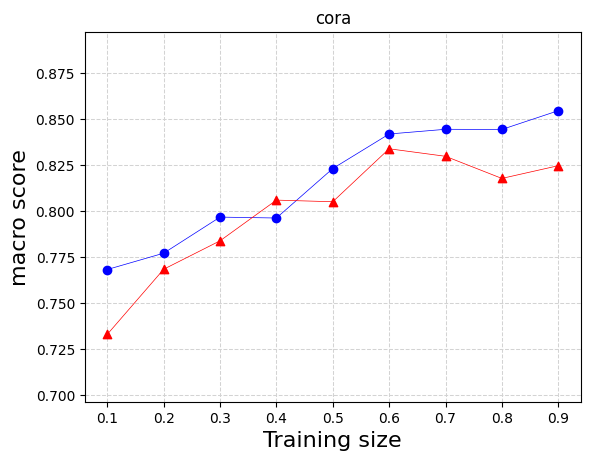

In [34]:
# Plot for macro scores
table_scores_plot(macro_df, 'macro')

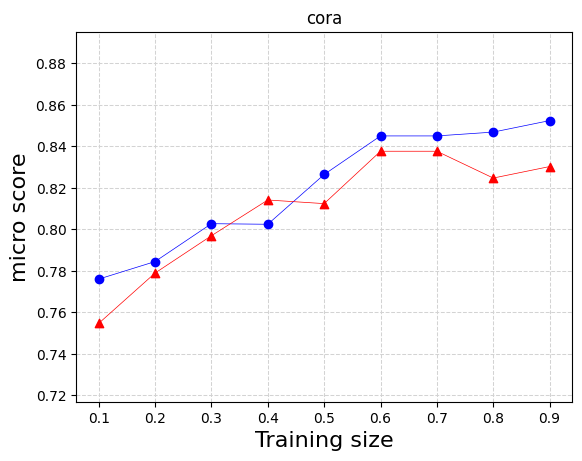

In [35]:
# Plot for macro scores
table_scores_plot(micro_df, 'micro')

In [36]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
         'num_different_nodes': 512,
         'dynamic_update': 'extend'}

dfs = []
dataset_names = ['cora', 'wikipedia', 'PPI', 'blog_catalog']

for dataset in dataset_names:

    config['dataset'] = dataset

    table_df = table_df_gen(results_df, config)

    dfs.append(table_df)

dfs[-1] = dfs[-1].loc[:3]  

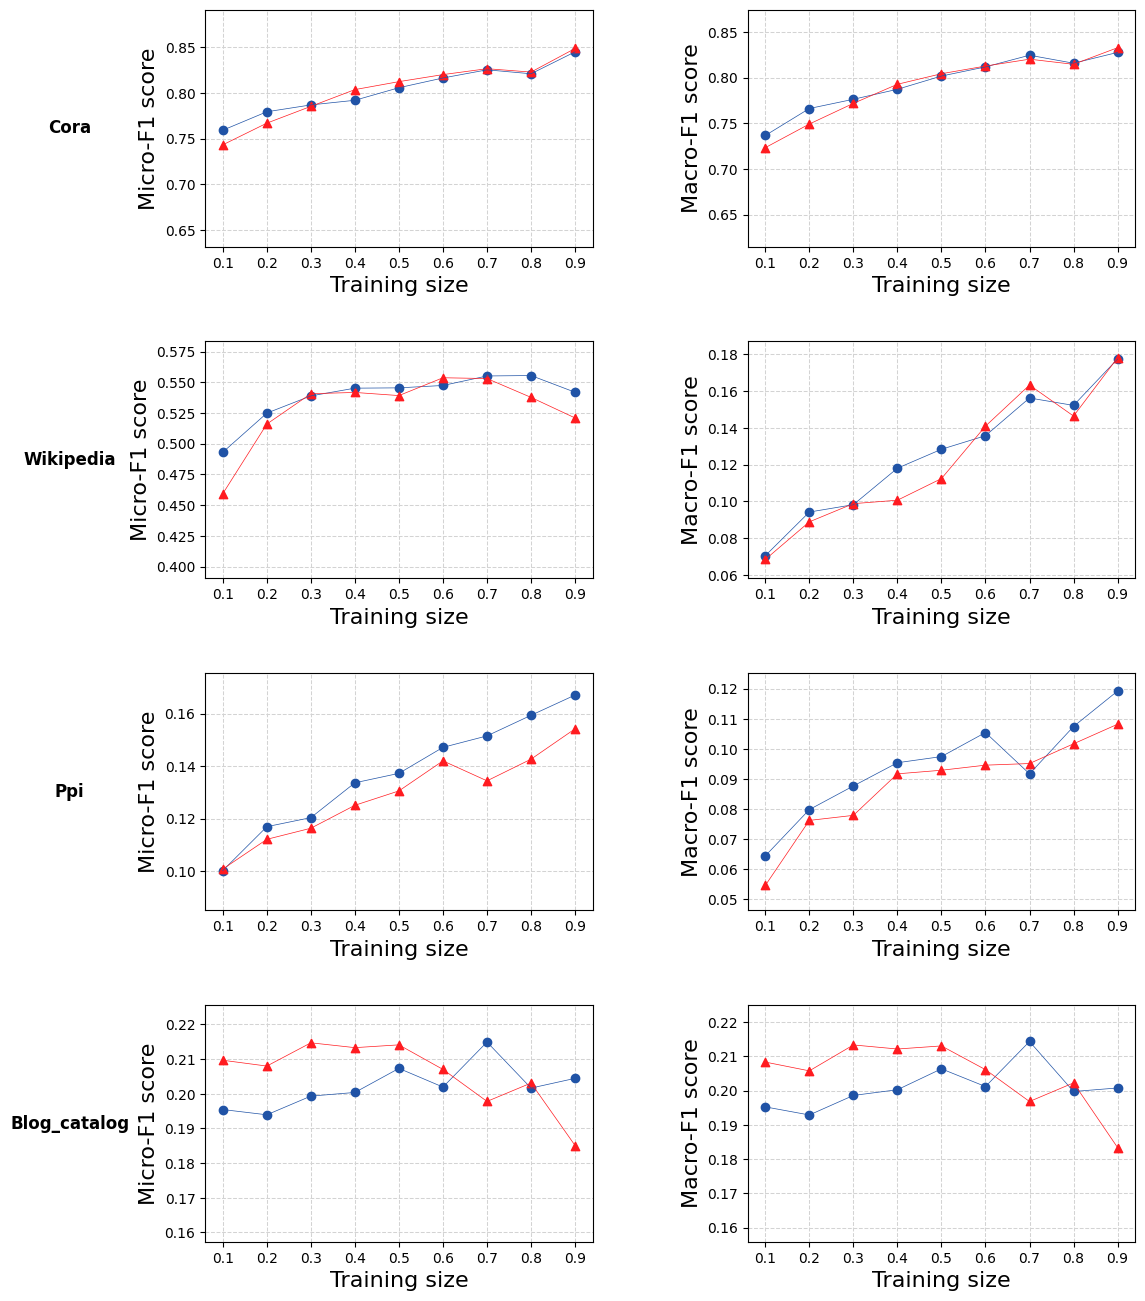

In [37]:
exp_table_scores_plot(dfs, dataset_names)

## Graphs 

In [38]:
speed_df = sub_df.copy()

In [39]:
speed_df.sort_values(by='average_accuracy', ascending=False).head(30)['parameters']

0    (128, 80, 160, 4, 4)
1    (128, 80, 160, 4, 4)
Name: parameters, dtype: object

In [40]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
speed_df[['walk_length', 'walks_num']] = speed_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

In [41]:
speed_df.tail(8)

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953,80,160


In [42]:
speed_df = speed_df.loc[speed_df['walk_length'] != 8]

In [43]:
speed_df['walk_length'].unique()

array([80])

In [44]:
global_speed_df = speed_df.loc[speed_df['retraining_type'] == 'global']
local_speed_df = speed_df.loc[speed_df['retraining_type'] == 'local']

In [45]:
global_speed_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160


In [46]:
global_speed_df.loc[global_speed_df['walk_length'] == 80, 'training_time'].mean()

415.683768033981

In [47]:
local_speed_df.loc[local_speed_df['walk_length'] == 80, 'training_time'].mean()


124.809953451157

In [48]:
global_speed_df.loc[global_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

In [49]:
local_speed_df.loc[local_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

## One parameter set evaluation 

In [7]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [8]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
          'metric': 'macro',
          'num_different_nodes': 512}

alL_stats_dict = {'extend': {}, 'prune': {}}

for dynamic_update in alL_stats_dict:

    for dataset in param_df['dataset'].unique():
        
        config['dataset'] = dataset
        sub_df = accu_time_df_gen(param_df, config)

        # if dynamic_update in list(sub_df['dynamic_update']):
        dynamic_df = sub_df[sub_df['dynamic_update'] == dynamic_update]
        dynamic_df = dynamic_df.reset_index(drop=True)

        #  # Calculate the average accuracy difference
        # avg_accuracy_diff_perc = 100 * (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # # Calculate the training time difference
        # training_time_diff_perc = 100 * (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        # Calculate the average accuracy difference
        avg_accuracy_diff_perc = (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # Calculate the training time difference
        training_time_diff_perc = (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        alL_stats_dict[dynamic_update].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})


In [9]:
alL_stats_dict

{'extend': {'blog_catalog': (0.04318085228351184, 0.6801121722255823),
  'wikipedia': (0.029285962240930375, 0.786130452798154),
  'PPI': (0.06563866343758801, 0.759588752940188),
  'cora': (0.0036741912773315976, 0.6984596418737402)},
 'prune': {'blog_catalog': (0.027702744479716407, 0.6661868255195622),
  'wikipedia': (0.1672134276511298, 0.7541873442683947),
  'PPI': (0.1066271459251596, 0.7964285125068936),
  'cora': (0.07093595182937153, 0.9196668580929749)}}

In [10]:
'prune' in list(sub_df['dynamic_update'])

True

In [11]:
sub_df = accu_time_df_gen(param_df, config)
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,0.750689,81.678901
1,cora,local,"(128, 40, 80, 0.25, 1)",prune,0.697438,6.561523
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
3,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241


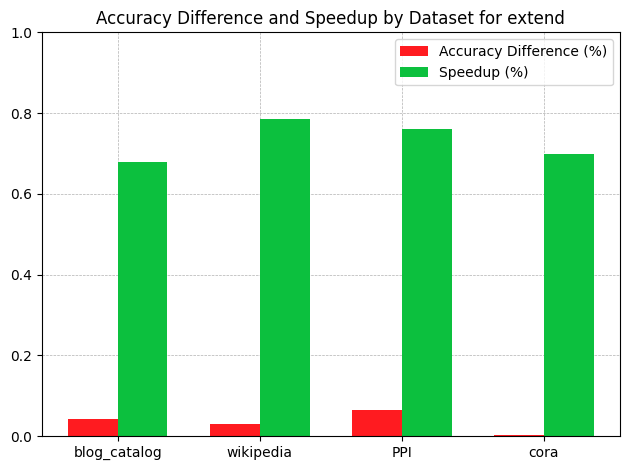

In [12]:
dynamic_update = 'extend'
stats_dict = alL_stats_dict[dynamic_update]

accu_speedup_dataset_plot(alL_stats_dict, dynamic_update)

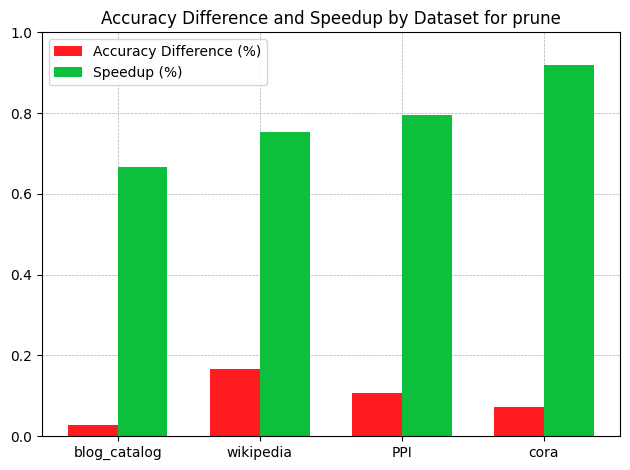

In [13]:
dynamic_update = 'prune'
stats_dict = alL_stats_dict[dynamic_update]

accu_speedup_dataset_plot(alL_stats_dict, dynamic_update)

In [65]:
list(all_df.sort_values(by='average_accuracy', ascending=False).head(15).loc[:, 'parameters'])

['(128, 40, 80, 2, 1)',
 '(128, 80, 80, 4, 2)',
 '(128, 80, 80, 4, 1)',
 '(128, 80, 80, 1, 4)',
 '(128, 40, 80, 0.25, 0.25)',
 '(128, 40, 80, 4, 2)',
 '(128, 80, 80, 1, 1)',
 '(128, 40, 80, 4, 4)',
 '(128, 40, 80, 1, 1)',
 '(128, 40, 80, 4, 2)',
 '(128, 80, 80, 2, 4)',
 '(128, 40, 80, 0.25, 0.25)',
 '(128, 80, 80, 2, 2)',
 '(128, 40, 80, 2, 1)',
 '(128, 80, 80, 0.25, 2)']

## Walk length

In [15]:
# all_datasets = list(results_df['dataset'].unique())
dynamic_update = 'extend'

all_datasets = ['blog_catalog', 'wikipedia', 'PPI', 'cora']
all_parameters = list(results_df['parameters'].unique())

config = {  'dynamic_update': 'extend',
            'metric': 'macro',
            'num_different_nodes': 512}

all_dataset_walk_dict = {}

for dataset in all_datasets:
    config['dataset'] = dataset
    
    all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

    # Apply the function to the 'parameters' column and create new columns
    all_df[['walk_length', 'walks_num']] = all_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

    all_df = all_df[['dataset', 'retraining_type', 'dynamic_update', 'walk_length', 'walks_num', 'average_accuracy', 'training_time']]
    all_df = all_df.loc[all_df['walk_length'] != 8]

    walk_df = all_df.groupby(['walk_length']).mean(['average_accuracy', 'training_time']).reset_index()

    dataset_walk_metric_dict = {row['walk_length']: [row['average_accuracy'], row['training_time']] for _, row in walk_df.iterrows()}

    all_dataset_walk_dict[dataset] = dataset_walk_metric_dict


In [16]:
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217814]},
 'wikipedia': {40.0: [0.11453129285081913, 2771.782344857853]},
 'PPI': {40.0: [0.09210627757010621, 261.20492931774686],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7914862135452094, 100.90610643863675],
  80.0: [0.7900403366123152, 201.27813012838362]}}

From these results we have similar accuracy but half training time with half walk length (for cora)

In [17]:
np.mean(all_df[all_df['walk_length'] == 40]['average_accuracy'])

0.7914862135452094

In [18]:
np.mean(all_df[all_df['walk_length'] == 80]['average_accuracy'])

0.7900403366123153

In [19]:
np.mean(all_df[all_df['walk_length'] == 40]['training_time'])

100.90610643863675

In [20]:
np.mean(all_df[all_df['walk_length'] == 80]['training_time'])

201.27813012838362

In [21]:
# fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# # Bar plot for Accuracy
# sns.barplot(ax=axes[0], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Accuracy', 'Walk Length 2 Accuracy']),
#             x='Dataset', y='value', hue='variable')
# axes[0].set_title('Accuracy by Dataset and Walk Length')
# axes[0].set_ylabel('Accuracy')
# axes[0].set_xlabel('')

# # Bar plot for Time
# sns.barplot(ax=axes[1], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Time', 'Walk Length 2 Time']),
#             x='Dataset', y='value', hue='variable')
# axes[1].set_title('Time by Dataset and Walk Length')
# axes[1].set_ylabel('Time')
# axes[1].set_xlabel('Dataset')

# plt.tight_layout()
# plt.show()


In [22]:
all_dataset_walk_dict

{'blog_catalog': {40.0: [0.201524007815397, 3256.033997217814]},
 'wikipedia': {40.0: [0.11453129285081913, 2771.782344857853]},
 'PPI': {40.0: [0.09210627757010621, 261.20492931774686],
  80.0: [0.09393444069159347, 492.3110450108846]},
 'cora': {40.0: [0.7914862135452094, 100.90610643863675],
  80.0: [0.7900403366123152, 201.27813012838362]}}

In [23]:
data = all_dataset_walk_dict

datasets = list(data.keys())
accuracies_40 = [data[ds].get(40.0, [0, 0])[0] for ds in datasets]
accuracies_80 = [data[ds].get(80.0, [0, 0])[0] for ds in datasets]
times_40 = [data[ds].get(40.0, [0, 0])[1] for ds in datasets]
times_80 = [data[ds].get(80.0, [0, 0])[1] for ds in datasets]

x = np.arange(len(datasets))
width = 0.35

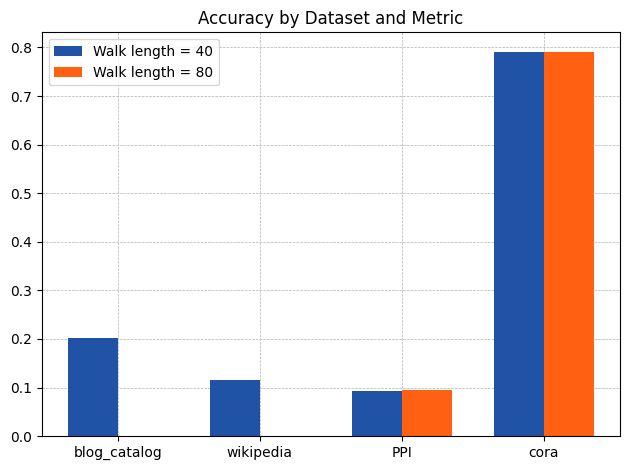

In [30]:
# Accuracy bar chart
fig, ax = plt.subplots()
ax.bar(x - width/2, accuracies_40, width, label='Walk length = 40', color='#2053A6')
ax.bar(x + width/2, accuracies_80, width, label='Walk length = 80', color='#FF6011')
# ax.set_xlabel('Dataset')
# ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Dataset and Metric')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Adjust spacing and save the plot
plt.tight_layout()
plt.savefig(f'figures/accuracy_walk_{dynamic_update}_plot.pdf', dpi=100, bbox_inches='tight')

plt.show()


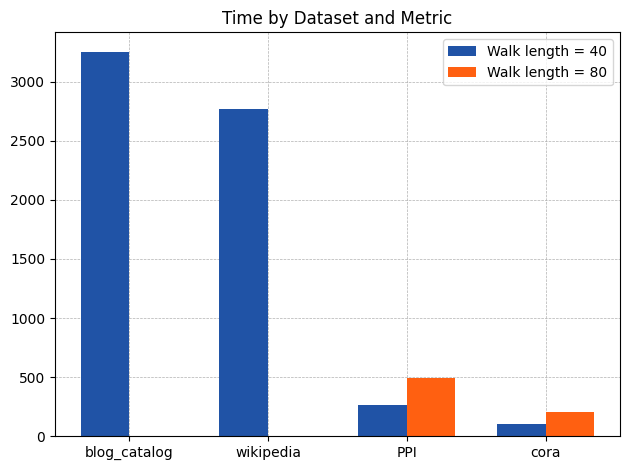

In [31]:
# Accuracy bar chart
fig, ax = plt.subplots()
ax.bar(x - width/2, times_40, width, label='Walk length = 40', color='#2053A6')
ax.bar(x + width/2, times_80, width, label='Walk length = 80', color='#FF6011')
# ax.set_xlabel('Dataset')
# ax.set_ylabel('Time (seconds)')
ax.set_title('Time by Dataset and Metric')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig(f'figures/time_walk_{dynamic_update}_plot.pdf', dpi=100, bbox_inches='tight')

plt.show()

In [27]:
ls figures/

accuracy_dataset_extend_plot.svg      degree_plot.pdf
accu_speedup_dataset_extend_plot.pdf  degree_plot.svg
accu_speedup_dataset_extend_plot.svg  degree_vs_frequency.pdf
accu_speedup_dataset_prune_plot.pdf   degree_vs_frequency.png
accu_speedup_dataset_prune_plot.svg   freq_plot.pdf
datasets_scores.pdf                   freq_plot.svg
datasets_scores.svg                   time_dataset_extend_plot.svg
degree_freq_plot.pdf                  visit_frequency_distribution.pdf
degree_freq_plot.svg                  visit_frequency_distribution.png
